## 1. Breath alcohol tests in Ames, Iowa, USA

Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# read the data into your workspace
ba_data = pd.read_csv('breath_alcohol_ames.csv')

# quickly inspect the data
print(ba_data.head())

   year  month  day  hour location gender   Res1   Res2
0  2017     12   17     1  Ames PD      M  0.046  0.046
1  2017     12   14     3   ISU PD      F  0.121  0.120
2  2017     12   10     5   ISU PD      F  0.068  0.067
3  2017     12   10     3   ISU PD      F  0.077  0.077
4  2017     12    9     2   ISU PD      M  0.085  0.084


In [3]:
# obtain counts for each year 
ba_year = ba_data['year'].value_counts()
ba_year

2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

## 2. What is the busiest police department in Ames? 

There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests?

In [4]:
pds = ba_data['location'].value_counts()
pds

ISU PD     940
Ames PD    616
Name: location, dtype: int64

## 3. Nothing Good Happens after 2am 

We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?

In [5]:
hourly = ba_data.groupby(['hour']).size().reset_index(name = 'Observation')

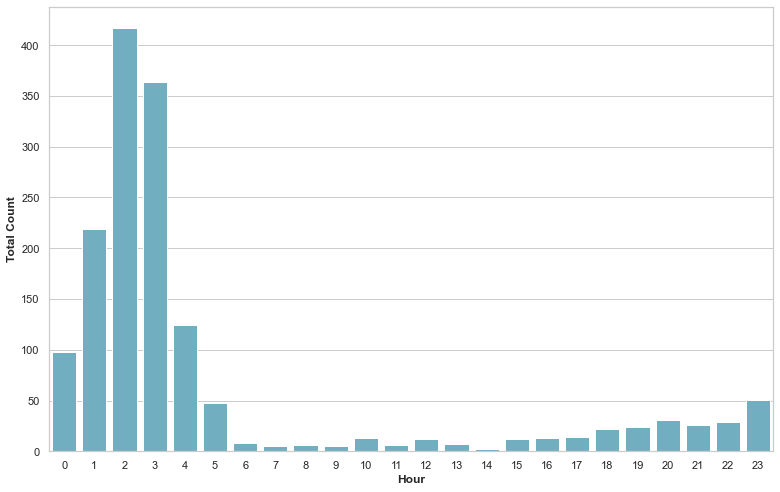

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,7))


sns.barplot(x = 'hour', y = 'Observation', data = hourly, color="c")


plt.ylabel("Total Count", weight = "bold")
plt.xlabel("Hour", weight = "bold")

plt.tight_layout()

## 4. Breathalyzer tests by month

Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?

In [9]:
monthly = ba_data.groupby(['month']).size().reset_index(name = 'Observation')

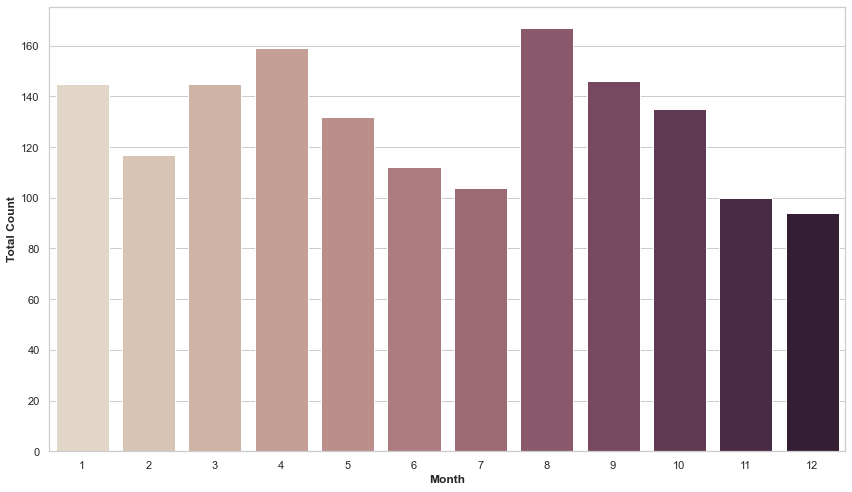

In [20]:
plt.figure(figsize=(12,7))

sns.barplot(x = 'month', y = 'Observation', data = monthly, palette = "ch:.25")

plt.ylabel("Total Count", weight = "bold")
plt.xlabel("Month", weight = "bold")

plt.tight_layout()

## 5. College

When we think of (binge) drinking in college towns in America, we usually think of something like this image at the left. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women.

In [22]:
counts_gender = ba_data['gender'].value_counts() 

gen = ba_data.dropna(subset=['gender']) 

mean_bas = gen.assign(meanRes=(gen.Res1+gen.Res2)/2)

In [23]:
mean_bas

,year,month,day,hour,location,gender,Res1,Res2,meanRes
0,2017,12,17,1,Ames PD,M,0.046,0.046,0.0460
1,2017,12,14,3,ISU PD,F,0.121,0.120,0.1205
2,2017,12,10,5,ISU PD,F,0.068,0.067,0.0675
3,2017,12,10,3,ISU PD,F,0.077,0.077,0.0770
4,2017,12,9,2,ISU PD,M,0.085,0.084,0.0845
...,...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,Ames PD,M,0.182,0.181,0.1815
1552,2013,1,4,2,ISU PD,M,0.066,0.065,0.0655
1553,2013,1,1,3,Ames PD,M,0.090,0.090,0.0900
1554,2013,1,1,2,ISU PD,F,0.132,0.131,0.1315


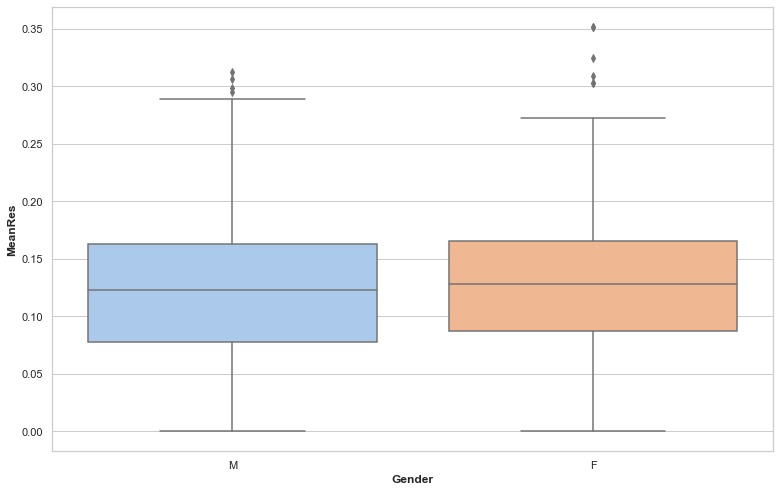

In [25]:
plt.figure(figsize=(11,7))

sns.boxplot(x = 'gender', y = 'meanRes', data = mean_bas,  palette="pastel")

plt.xlabel("Gender", weight = "bold")
plt.ylabel("MeanRes", weight = "bold")
plt.tight_layout()

## 6. Above the legal limit 

In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for all 50 states. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (Res1, Res2) are above 0.08, the person would be charged with DUI (driving under the influence).

In [26]:
duis = ba_data[(ba_data.Res1 > 0.08) | (ba_data.Res2 > 0.08)] 

# proportion of tests that would have resulted in a DUI
p_dui = duis.shape[0] / ba_data.shape[0]
p_dui

0.7448586118251928

## 7. Breathalyzer tests: is there a pattern over time? 

We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time.

In [27]:
# Create date variable
# ba_data = ba_data.assign(date = pd.to_datetime(ba_data[['year', 'month', 'day']]))
ba_data['date'] = pd.to_datetime(ba_data[['year', 'month', 'day']])

# Create a week variable
# ba_data = ba_data.assign(week= ba_data['date'].dt.week)
ba_data['week'] = ba_data['date'].dt.week

# Check your work
ba_data.head()

<ipython-input-27-12fc2219c375>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ba_data['week'] = ba_data['date'].dt.week


,year,month,day,hour,location,gender,Res1,Res2,date,week
0,2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,50
1,2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2,2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,49
3,2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,49
4,2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49


## 8. Looking at timelines

How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new week variable to look at test frequency over time. We end with a time series plot showing the frequency of breathalyzer tests by week in year, with one line for each year.

In [30]:
# create the weekly data set (most similar to original project)
# weekly1 = ba_data[['year', 'week', 'gender']]
# weekly1.groupby(['week','year']).count().unstack().plot()

# choose the variables of interest, count 
timeline = ba_data.groupby(['week','year']).count()['Res1'].reset_index()

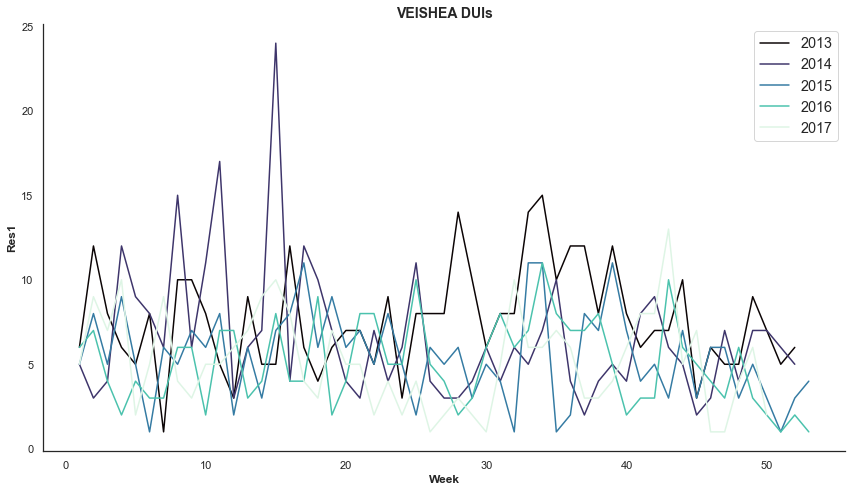

In [40]:
plt.figure(figsize=(12,7))

sns.set_style("white")
sns.lineplot(x = 'week', y = 'Res1', hue = 'year', palette="mako", data = timeline) 

plt.title("VEISHEA DUIs", fontsize = 14, weight = "bold")
plt.xlabel("Week", weight = "bold")
plt.ylabel("Res1", weight = "bold")


plt.legend(fontsize = "large")
sns.despine()
plt.tight_layout()